In [ ]:
import pandas as pd 
df = pd.read_csv('generated_data.csv')
df.head()

,X,1_Polynomial,2_Sinusoidal,3_Exponential,4_Logarithmic,5_Tanh,6_Quadratic_Sinusoidal,7_Piecewise,8_Rational,9_Gaussian_Product,10_Multiplicative_Noise,11_Post_Nonlinear_1,12_Post_Nonlinear_2
0,0.496714,-0.190059,-0.013115,0.541009,0.335754,0.392011,0.677582,0.179207,0.734584,0.125262,0.230067,0.426296,1.652464
1,-0.138264,-0.124461,-0.770742,1.133827,0.115053,-0.151842,-0.196835,0.357387,0.966790,0.004303,0.018841,0.144030,0.866326
2,0.647689,-0.322693,-0.840016,0.444012,0.420131,0.490870,0.806011,0.340258,0.625231,0.196527,0.386258,0.585455,1.916280
3,1.523030,-0.375671,-0.159594,0.187254,0.894664,0.878428,1.793949,2.288824,0.270443,0.197248,2.248185,1.704914,3.314328
4,-0.234153,-0.428932,-1.089728,1.074477,0.021024,-0.419327,-0.457582,0.294533,0.758661,-0.137459,0.044446,0.360621,0.630784


In [2]:
from utils import CITestRunner
# get CIT matrix
citest_runner = CITestRunner(df.values)
kci_matrix = citest_runner.run_csl("kci")
rci_matrix = citest_runner.run_csl("rcit")
hsic_matrix = citest_runner.run_hsic()

# get single CIT test
p_value = citest_runner.run_cit('fisherz', 0, 1, [2,3])

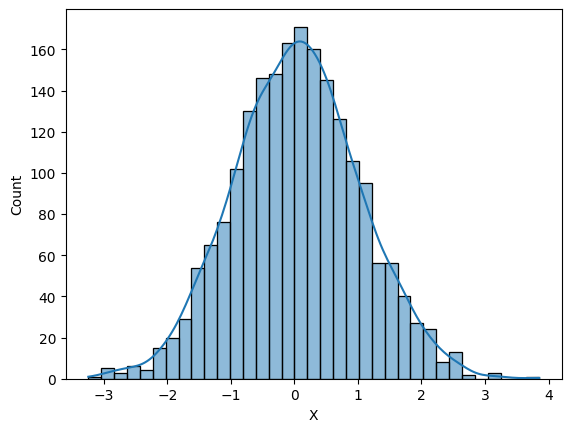

In [3]:
from utils import plot_histograms_single
plot_histograms_single(df['X'])

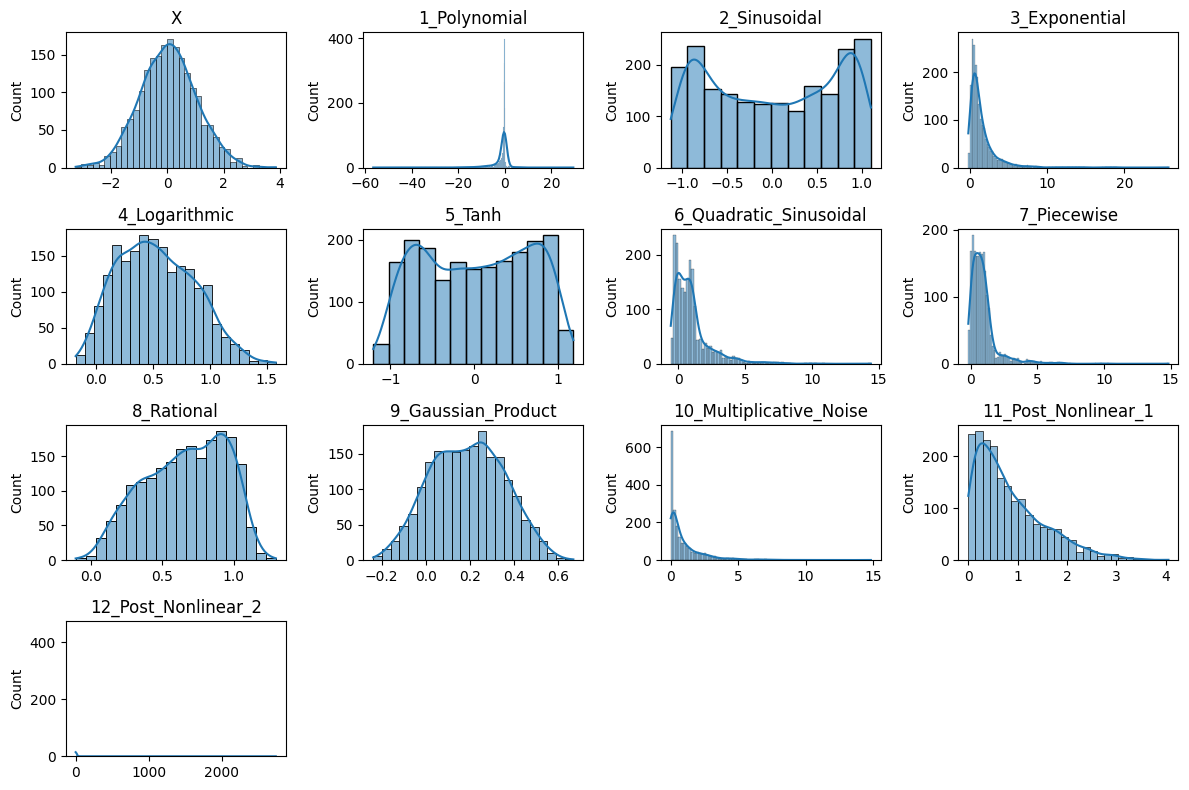

In [4]:
from utils import plot_histograms_all
plot_histograms_all(df)

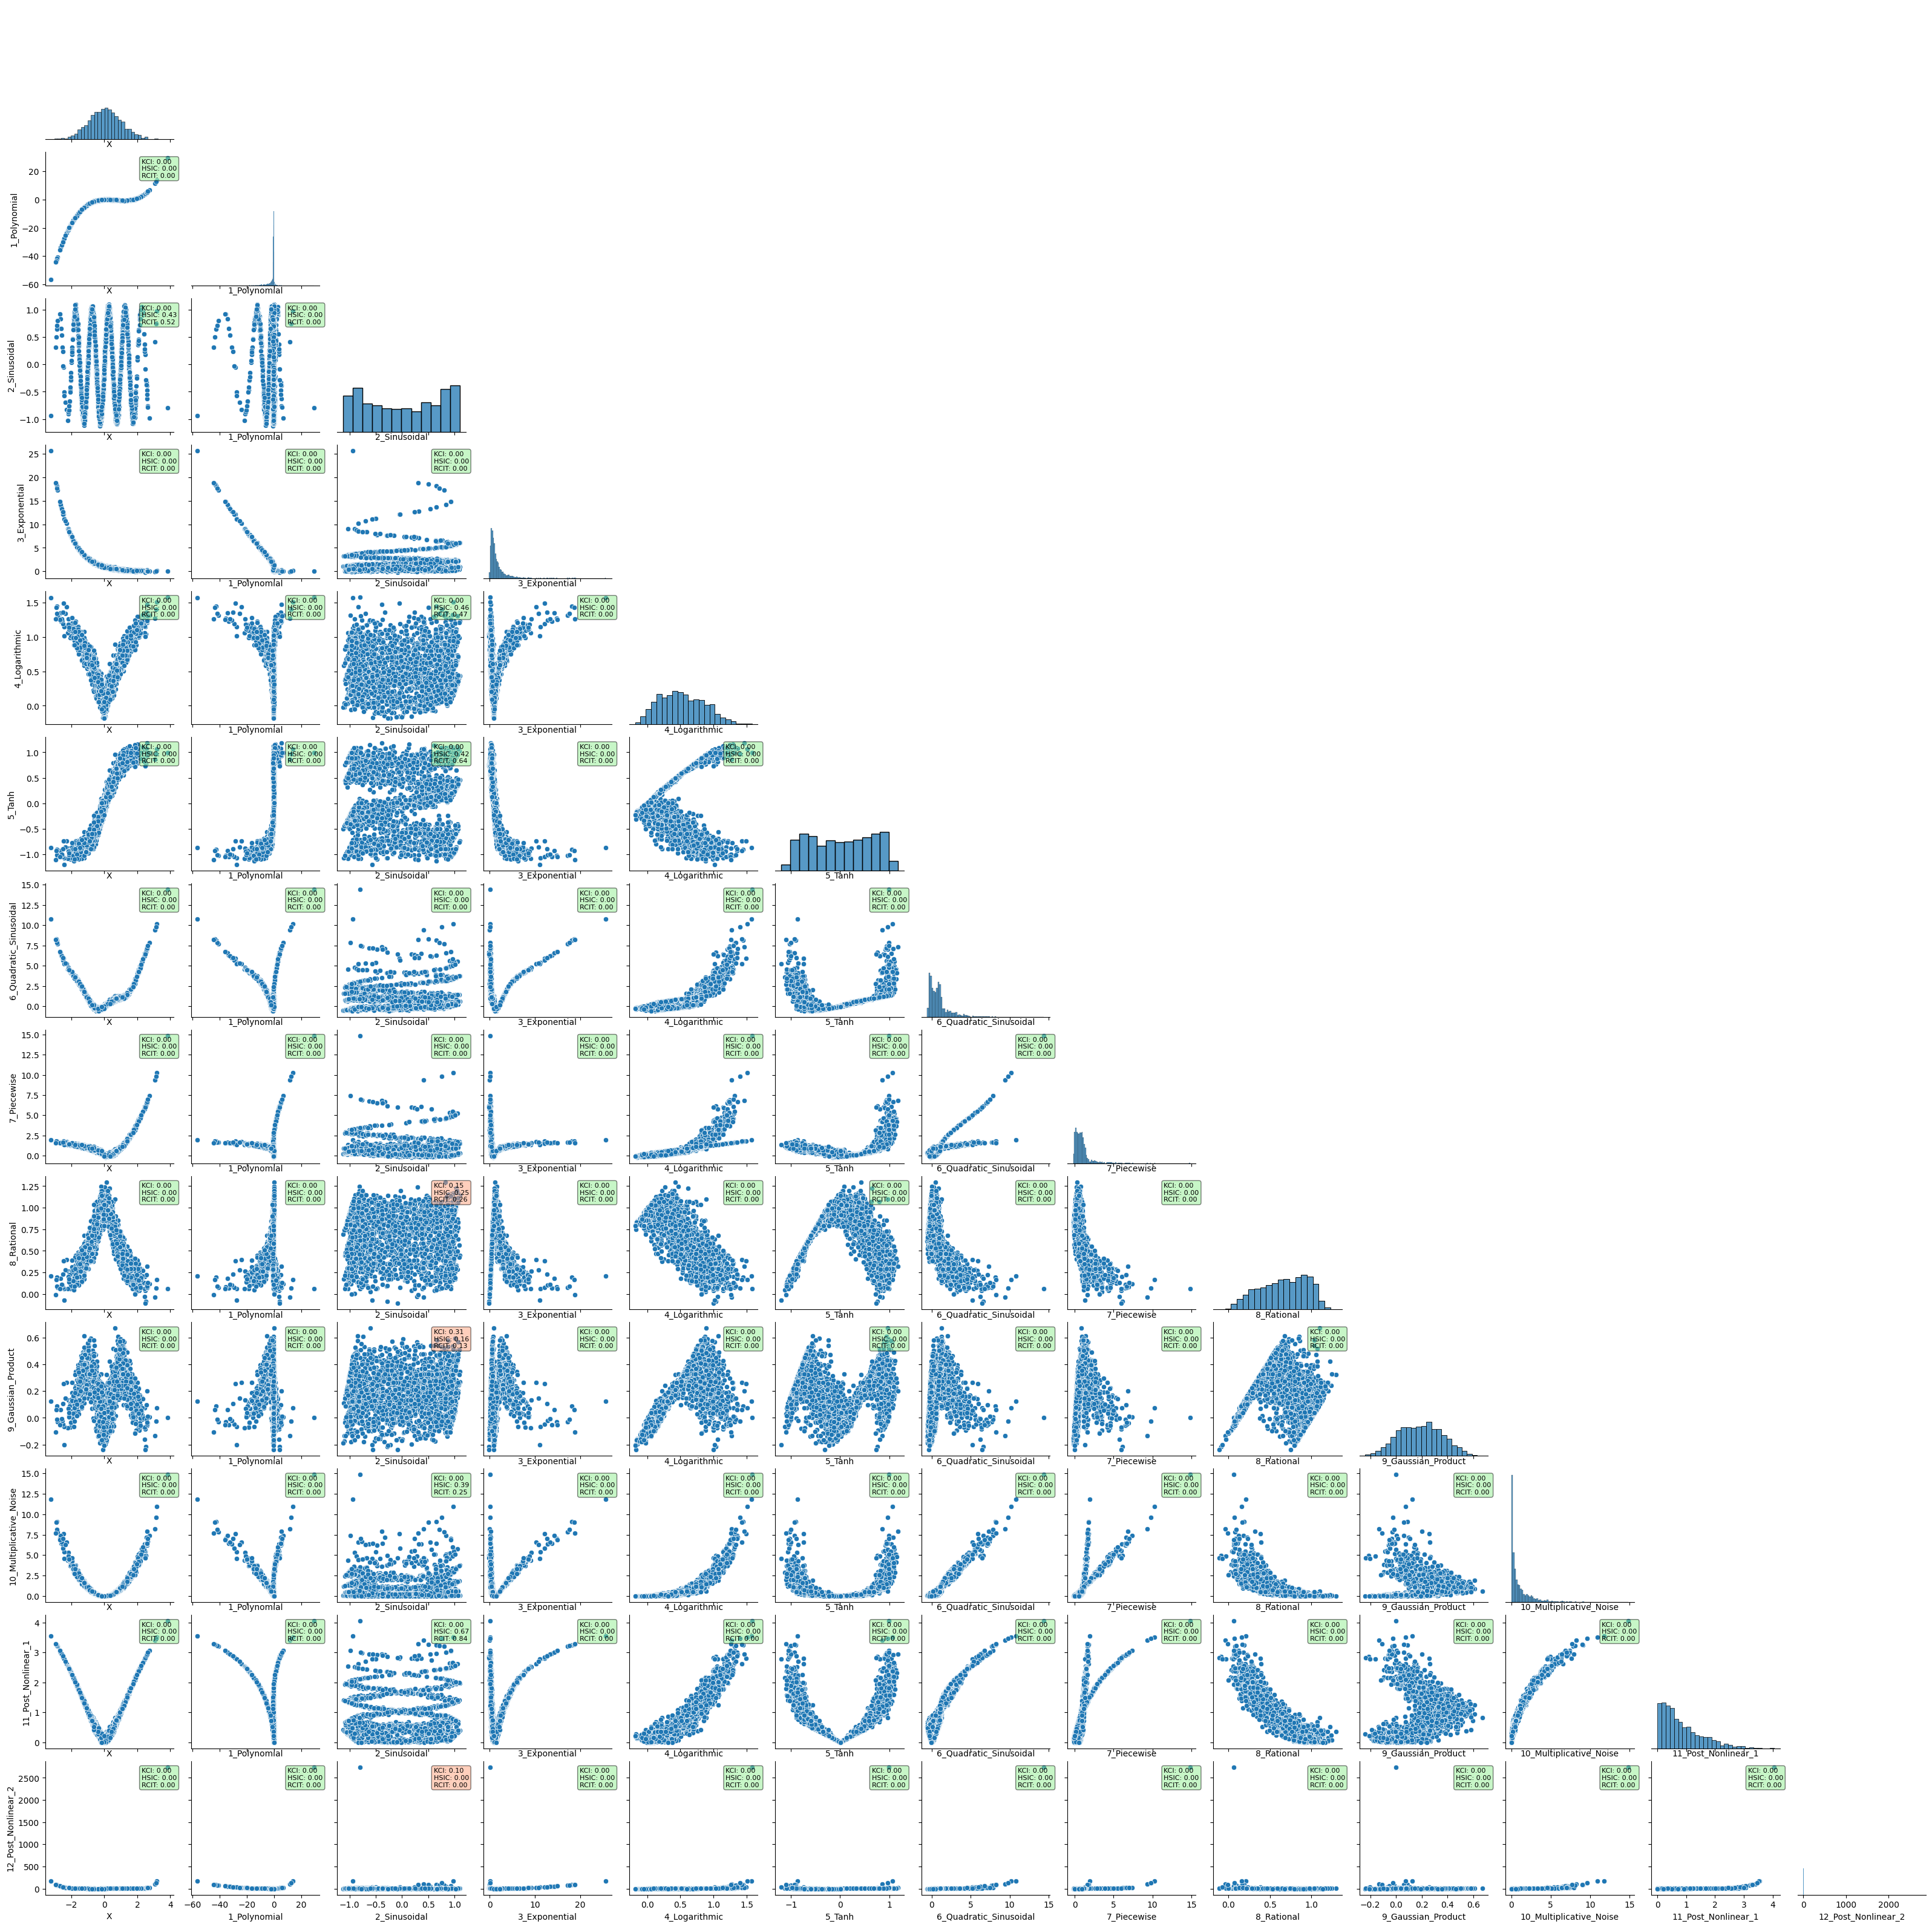

In [5]:
from utils import run_scatterplot
run_scatterplot(df, kci_matrix, hsic_matrix, rci_matrix)

Running PC algorithm on data with shape: (2000, 13)


  0%|          | 0/13 [00:00<?, ?it/s]

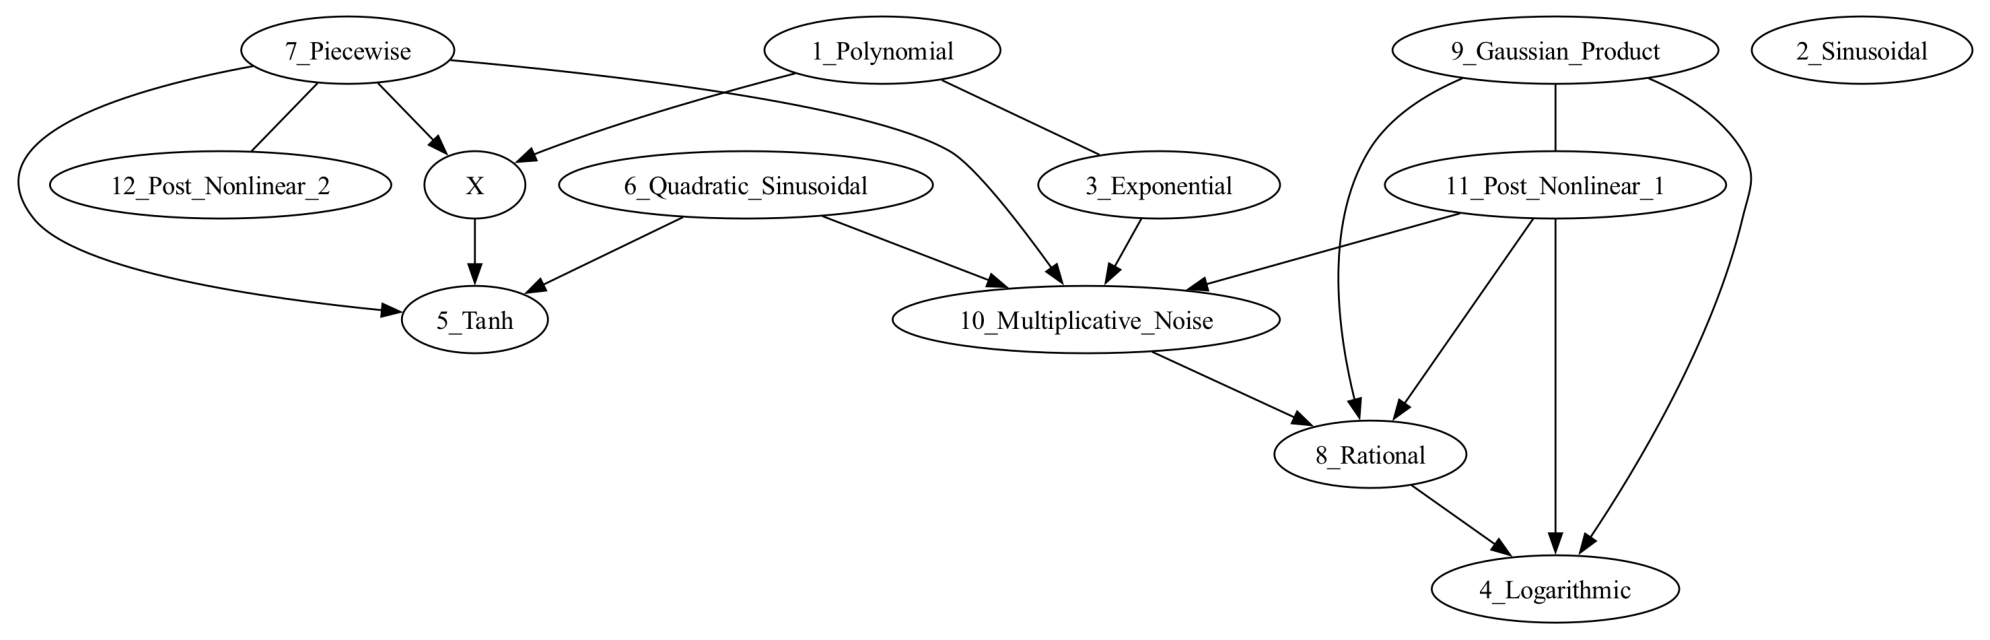

In [6]:
from utils import run_pc
cg, path = run_pc(data=df.values, alpha=0.01, indep_test='fisherz', label=df.columns.values)

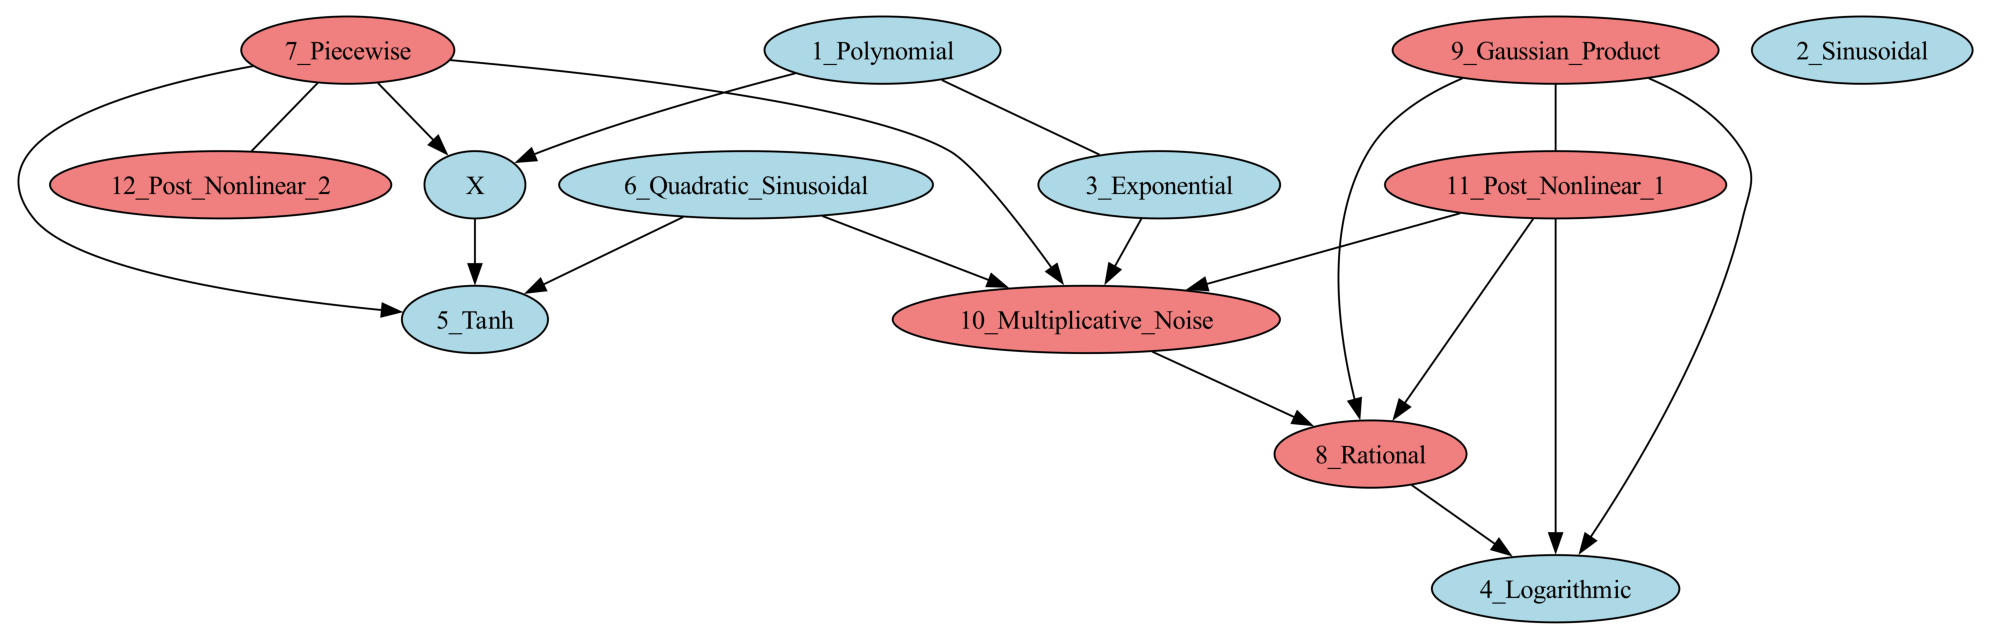

In [7]:
from utils import get_feature_to_color, to_pydot_color
category_to_features = {
    'class1': ['X', '1_Polynomial', '2_Sinusoidal', '3_Exponential', '4_Logarithmic', '5_Tanh', '6_Quadratic_Sinusoidal'],
    'class2': ['7_Piecewise', '8_Rational', '9_Gaussian_Product', '10_Multiplicative_Noise', '11_Post_Nonlinear_1', '12_Post_Nonlinear_2']
}
feature_to_color_dict = get_feature_to_color(category_to_features)
to_pydot_color(cg.G, df.columns.values, feature_to_color_dict, path)

In [8]:
from utils import build_general_graph_from_adjacency_matrix
build_general_graph_from_adjacency_matrix(cg.G.graph, df.columns.values)

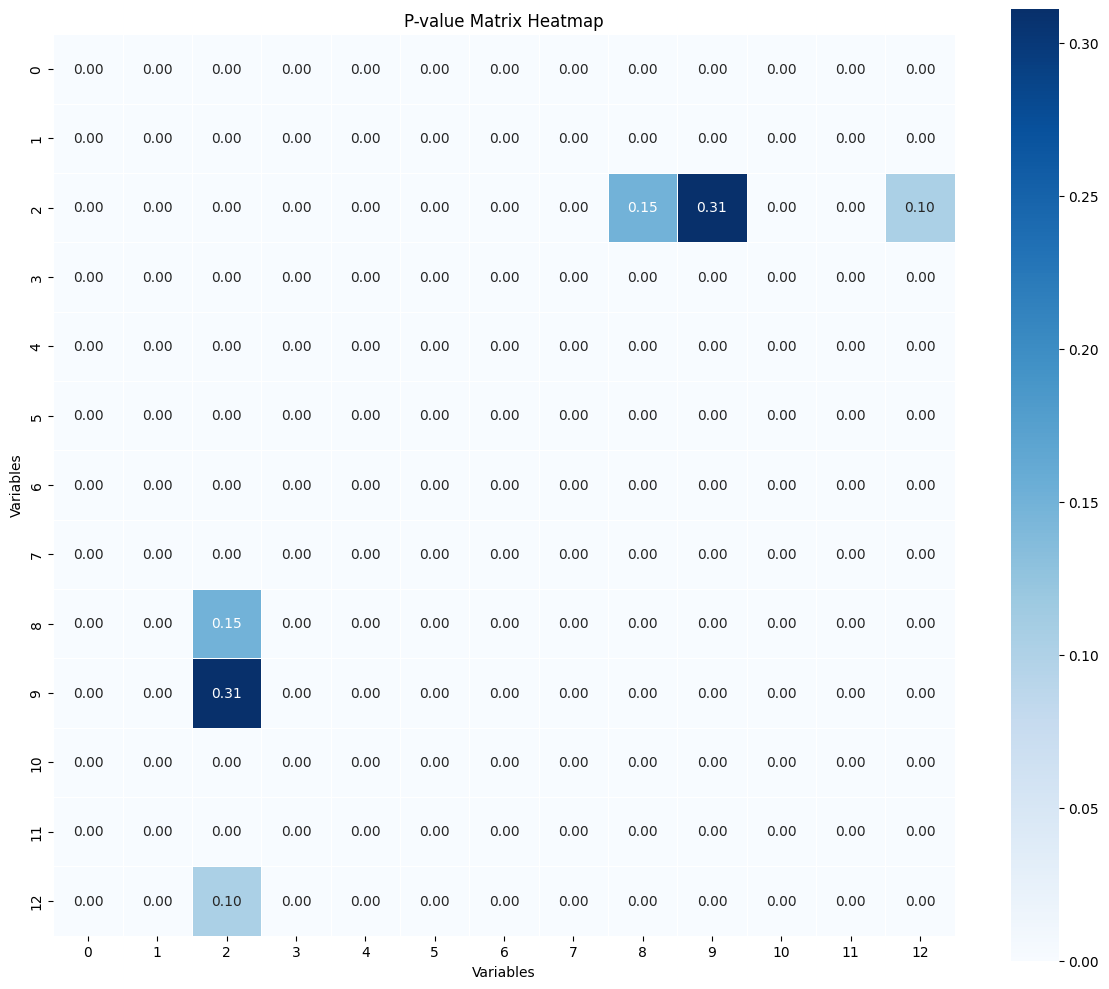

In [9]:
from utils import plot_heatmap 
plot_heatmap(kci_matrix)